## CodeClause Internship Project - Road Lane Detection
Intern ID - CC51516

Intern Name - Sahib Preet Singh

Designation - Artificial Intelligence Intern

### Project Description
This project is based on the detection of road lanes. It is the base step of creating a self driving car project. In this I have collected the images data from kaggle. It involves processing images of roads to identify and highlight lane markings. The pipeline includes steps like grayscale conversion, edge detection, region of interest masking, and Hough line transformation.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
import cv2
import os

Considering two imagees for better preparation of model as one have white border lines and other have yellow border lines and both the images have white dashed lines on the road to understand the different lanes for efficient model.

In [3]:
img1 = mpimg.imread("C:\python\CodeClauseInternship_RoadLaneDetection\images\swr.jpg")
yheight1 = img1.shape[0]
xwidth1 = img1.shape[1]

img2 = mpimg.imread("C:\python\CodeClauseInternship_RoadLaneDetection\images\syl.jpg")
yheight2 = img2.shape[0]
xwidth2 = img2.shape[1]

### Pre-processing of the image using

1. Grayscale method -> process of converting a full-color image into a single-channel image where each pixel represents the intensity of light, in short removing color information.

2. Gaussian blur -> involves applying weighted average to each pixel and its neighbouring pixels, smoothing out high frequency noise and details in image using gaussian distribution.

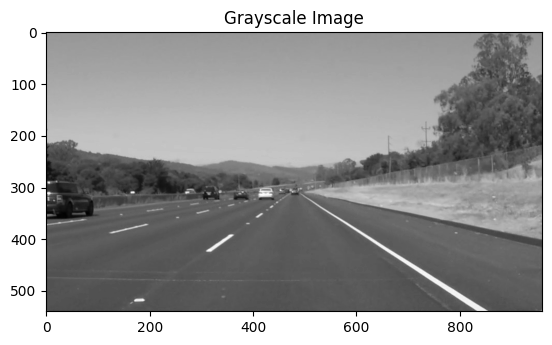

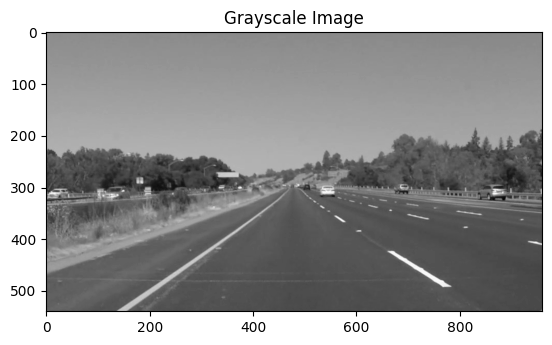

In [4]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
graying1 = grayscale(img1)
graying2 = grayscale(img2)
plt.title("Grayscale Image")
plt.imshow(graying1, cmap='gray')
plt.show()
plt.title("Grayscale Image")
plt.imshow(graying2, cmap='gray')
plt.show()

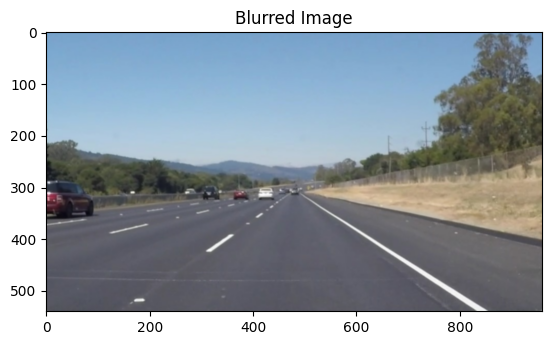

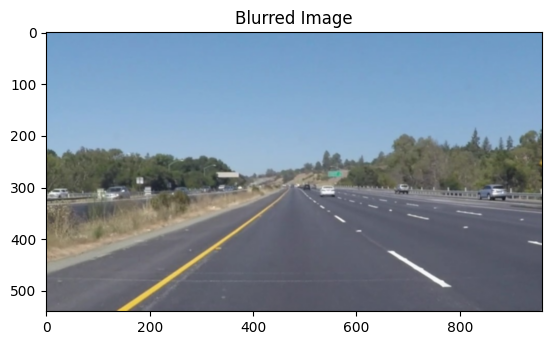

In [5]:
def gaussian_blur(image, kernel):
    return cv2.GaussianBlur(image, (kernel, kernel), 0)
 
ksize = 3
gaussianBlur1 = gaussian_blur(img1, ksize)
gaussianBlur2 = gaussian_blur(img2, ksize)
plt.imshow(gaussianBlur1, cmap='gray') 
plt.title("Blurred Image")
plt.show()
plt.imshow(gaussianBlur2, cmap='gray')
plt.title("Blurred Image")
plt.show()

### Canny Edge Detection

It is an edge detection method used in image processing to identify sharp changes in intensity specifically edges. I  set minimum and maximum threshold values in this which refers to lower and upper intensity thresholds which I have set it to 150 as min and 220 as max. This approach  helps distinguish meaningful edges from noise in the image. and I have used an additional parameter i.e cmap = "Greys_r" for reverse the intensity mapping of grayscale image.

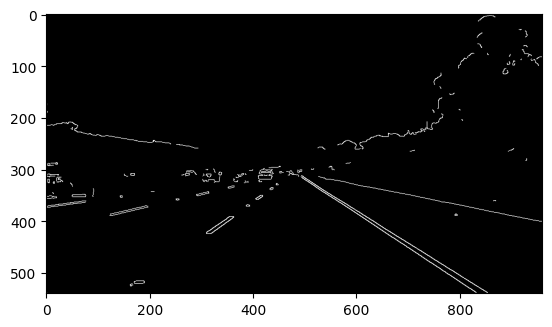

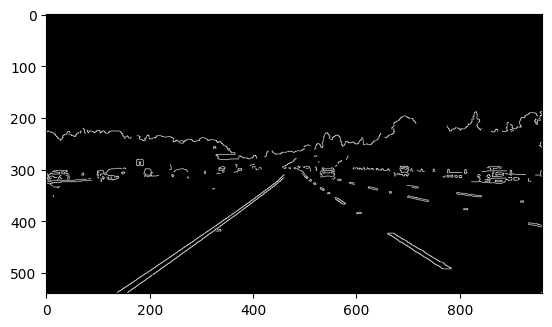

In [6]:
def canny(img, low_threshold, high_threshold):
        return cv2.Canny(img, low_threshold, high_threshold)

minTh = 150
maxTh = 220
edgeDetectedImage1 = canny(gaussianBlur1, minTh, maxTh)
plt.imshow(edgeDetectedImage1, cmap="Greys_r")
plt.show()
edgeDetectedImage2 = canny(gaussianBlur2, minTh, maxTh)
plt.imshow(edgeDetectedImage2, cmap="Greys_r")
plt.show()

### Region Masking

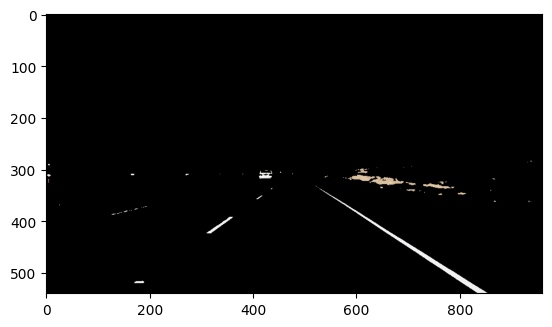

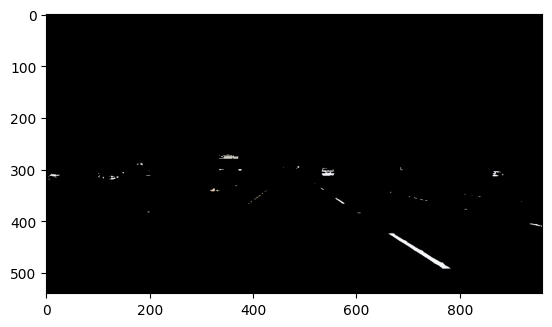

In [7]:
line_image1 = np.copy(img1)
line_image2 = np.copy(img2)

#Defining criteria of selecting colour threshold variables and Let threshold be th
red_th = 210
green_th = 180
blue_th = 150

thresholds_for1 = (img1[:,:,0] < red_th) \
                | (img1[:,:,1] < green_th) \
                | (img1[:,:,2] < blue_th)

thresholds_for2 = (img2[:,:,0] < red_th) \
            | (img2[:,:,1] < green_th) \
            | (img2[:,:,2] < blue_th)

line_image1[thresholds_for1] = [0,0,0]
line_image2[thresholds_for2] = [0,0,0]

#plt.imshow(img1)
#plt.show()
plt.imshow(line_image1)
plt.show()

#plt.imshow(img2)
#plt.show()
plt.imshow(line_image2)
plt.show()

In [8]:
l_bottom = np.array([100, 539])
r_bottom = np.array([950, 539])
apex = np.array([480, 290])

#As we go ahead, road somewhat assumes to be triangle in shape, though it is not so we will make a line fit on the 3 sides
fit_l = np.polyfit((l_bottom[0], apex[0]), (l_bottom[1], apex[1]), 1)
fit_r = np.polyfit((r_bottom[0], apex[0]), (r_bottom[1], apex[1]), 1)
fit_b = np.polyfit((l_bottom[0], r_bottom[0]), (l_bottom[1], r_bottom[1]), 1)

print(fit_l)
print(fit_r)
print(fit_b)




[ -0.65526316 604.52631579]
[ 0.52978723 35.70212766]
[-7.90229623e-17  5.39000000e+02]


Marking Region

In [9]:
x_cord1, y_cord1 = np.meshgrid(np.arange(0,xwidth1), np.arange(0,yheight1))
x_cord2, y_cord2 = np.meshgrid(np.arange(0,xwidth2), np.arange(0,yheight2))

region_th1 = (y_cord1 > (x_cord1*fit_l[0]  + fit_l[1])) & \
            (y_cord1 > (x_cord1*fit_r[0]  + fit_r[1])) & \
            (y_cord1 > (x_cord1*fit_b[0] + fit_b[1]))

region_th2 = (y_cord2 > (x_cord2*fit_l[0]  + fit_l[1])) & \
            (y_cord2 > (x_cord2*fit_r[0]  + fit_r[1])) & \
            (y_cord2 > (x_cord2*fit_b[0] + fit_b[1]))\
            
#for region selection            
line_image1[thresholds_for1 | ~region_th1] = [0,0,0]
line_image2[thresholds_for2 | ~region_th2] = [0,0,0]

#for color markings
color_select1 = np.copy(img1)
color_select2 = np.copy(img2)

'''
This condition selects pixels that do not meet the color threshold criteria
(~thresholds_for1) but lie within the region of interest (region_th1). Such pixels are set to green in color_select1.
'''

color_select1[~thresholds_for1 | region_th1] = [0,255,0]  
color_select2[~thresholds_for2 | region_th2] = [0,255,0]


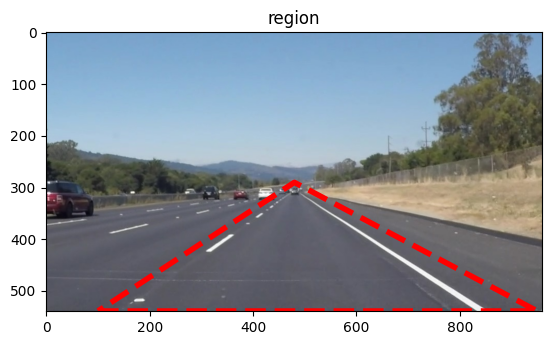

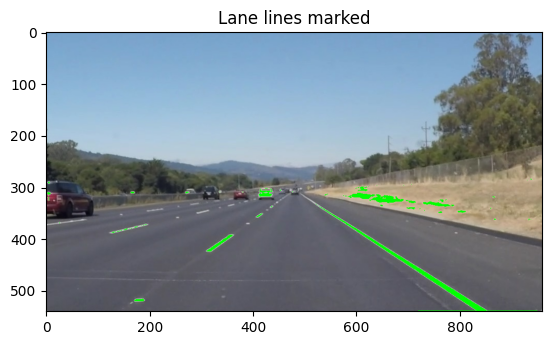

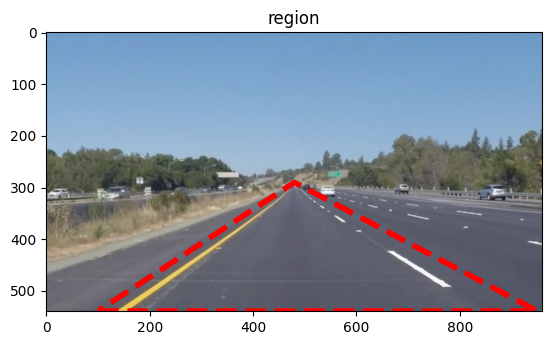

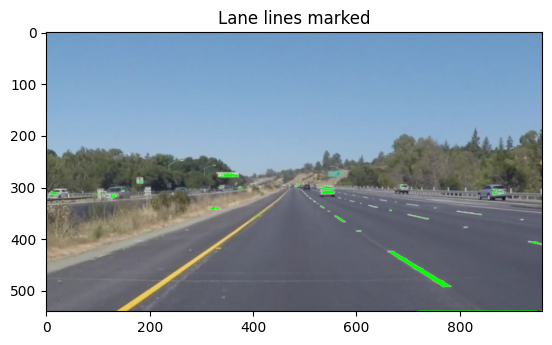

In [10]:
# Plot the result for 1
plt.imshow(img1)
x = [l_bottom[0], r_bottom[0], apex[0], l_bottom[0]]
y = [l_bottom[1], r_bottom[1], apex[1], l_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("region")
plt.show()
plt.imshow(color_select1)
plt.title("Lane lines marked")
plt.show()

# Plot the result for 2
plt.imshow(img2)
x = [l_bottom[0], r_bottom[0], apex[0], l_bottom[0]]
y = [l_bottom[1], r_bottom[1], apex[1], l_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("region")
plt.show()
plt.imshow(color_select2)
plt.title("Lane lines marked")
plt.show()



On observing we can infer that it is a triangle based region which is given right output but we can definitely improve our model using Polygon dimensioning that taking the 4th edge too using Hough Transformation.



### Hough Transformation
-> Technique under Computer vision that detect lines and shape in images by transforming them into parameter space, It provides efficiency and reliability.

-> It is used to detect lines, circles, ellipses, etc. and used in image analysis, computer vision, and digital image processing.



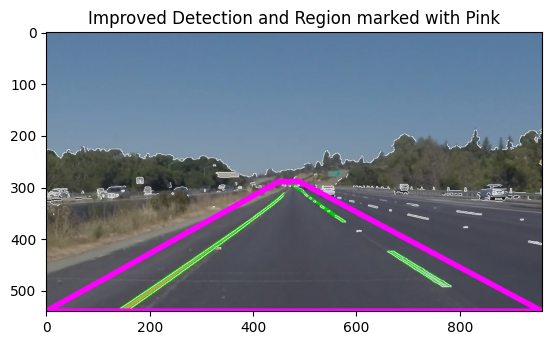

In [11]:
mask = np.zeros_like(edgeDetectedImage2)   
ignore_mask_color = 255 
imshape = img2.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edgeDetectedImage2, mask)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    global lines
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), 
              minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)   
    return line_img
    
    
#hough lines
rho = 1
theta = np.pi/180
threshold = 30
min_line_len = 20 
max_line_gap = 20

global houghed
houged = hough_lines(masked_edges, rho, theta, 
                  threshold, min_line_len, max_line_gap)

for i in lines:
    for x1,y1,x2,y2 in i:
        cv2.line(img2, (x1, y1), (x2, y2), [0,255,0], 2)

color_edge = np.dstack((edgeDetectedImage2, edgeDetectedImage2, edgeDetectedImage2))
combo = cv2.addWeighted(img2, 0.8, color_edge, 1, 0)
combo1 = cv2.polylines(combo, vertices, True, (255,0,255), 10)
plt.title("Improved Detection and Region marked with Pink")
plt.imshow(combo)
plt.show()

Defining functions for creating a pipeline

In [12]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    if len(img.shape) >2:
        c_count = img.shape[2]
        ignore_mask_color = (255,)*c_count
    else:
        ignore_mask_color = 255
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(img,mask)
    return masked_image

def  weighted_img(output_img, input_img, α=0.1, β=1., γ=0. ):
    lines_edges = cv2.addWeighted(input_img, α, output_img, β, γ)
    return lines_edges

def draw_lines(img, lines, color=[240, 248, 255], thickness=10):
    for line in lines:
        for x1,y1,x2,y2 in line:
            x = (x1,y1)
            y = (x2,y2)
            cv2.line(img, x, y, color, thickness)

def slope_lines(img,lines):

    img = img.copy()
    poly_vertices = []
    order = [0,1,3,2]

    l_lines = [] 
    r_lines = [] 
    for line in lines:
        for x1,y1,x2,y2 in line:

            if x1 == x2:
                pass 
            else:
                m = (y2 - y1) / (x2 - x1)
                c = y1 - m * x1

                if m < 0:
                    l_lines.append((m,c))
                elif m >= 0:
                    r_lines.append((m,c))

    left_line = np.mean(l_lines, axis=0)
    right_line = np.mean(r_lines, axis=0)

    for slope, intercept in [left_line, right_line]:
        rows, cols = img.shape[:2]
        y1= int(rows) 
        y2= int(rows*0.6) 
        x1=int((y1-intercept)/slope)
        x2=int((y2-intercept)/slope)
        poly_vertices.append((x1, y1))
        poly_vertices.append((x2, y2))
        draw_lines(img, np.array([[[x1,y1,x2,y2]]]))
    
    poly_vertices = [poly_vertices[i] for i in order]
    cv2.fillPoly(img, pts = np.array([poly_vertices],'int32'), color = (135, 206, 235))
    return cv2.addWeighted(img,0.3,img,0.4,0.)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    line_img = slope_lines(line_img,lines)
    return line_img

def get_vertices(image):
    r,c = image.shape[:2]
    bottom_left = [c*0.1, r*0.95]
    top_left = [c*0.4, r*0.6]
    bottom_right = [c*0.9, r*0.95]
    top_right = [c*0.6, r*0.6]
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    return vertices


### Need of pipeline creation

Creating a pipeline in digital image processing is essential for organizing and executing a series of processing steps to achieve a desired model. Pipelines help streamline the workflow, improve code modularity, and enhance reusability.

In [13]:
def pipeline(image):

    gray = grayscale(image)
    blur = gaussian_blur(gray, 5)
    edges = canny(blur, 50, 150)
    masked_edges = region_of_interest(edges, get_vertices(image))
    lines = hough_lines(masked_edges, 1, np.pi/180, 35, 5, 2)
    result = weighted_img(lines, image, α=0.8, β=1., γ=0.)
    return result

### TESTING OF THE MODEL ON DIFFERENT IMAGES

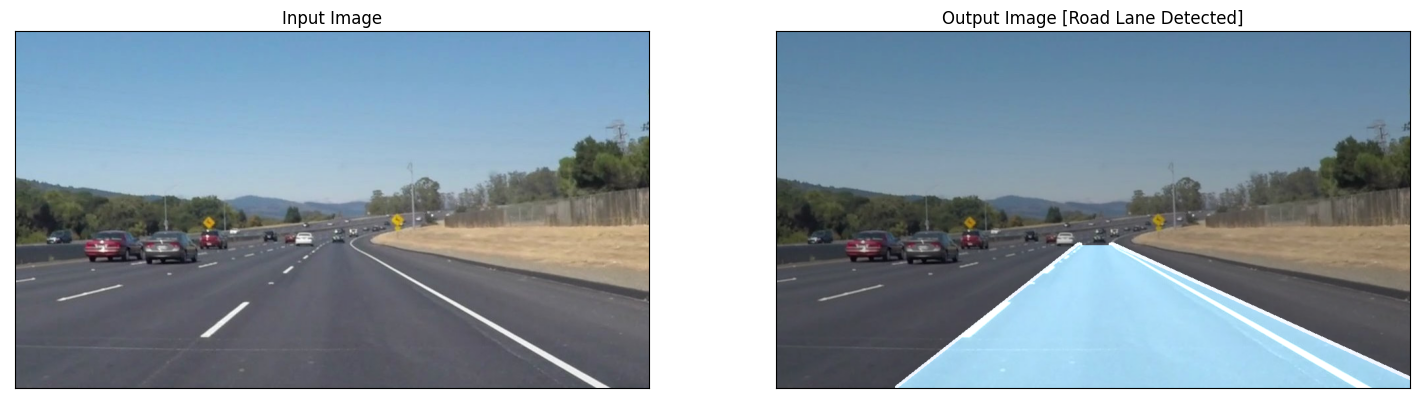

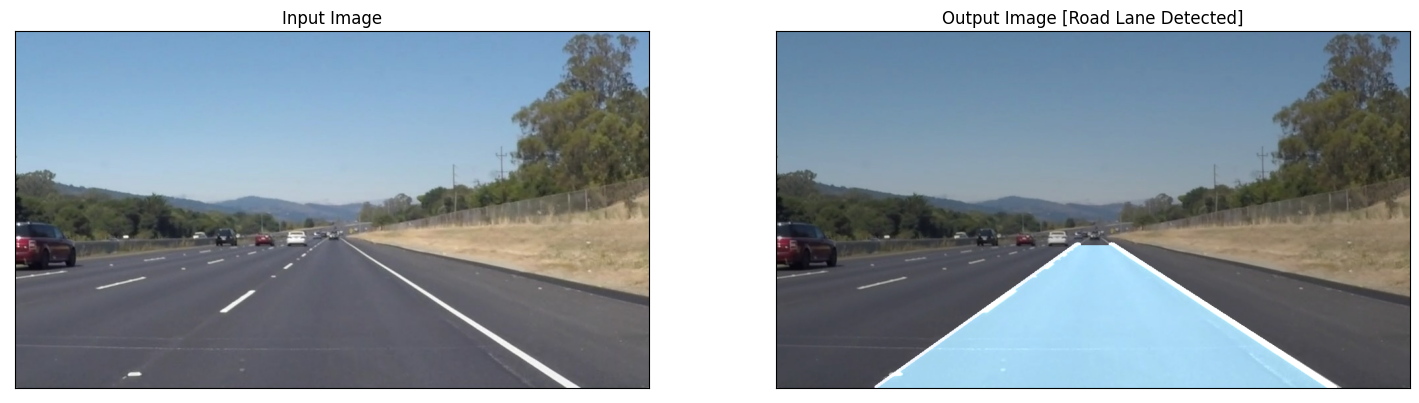

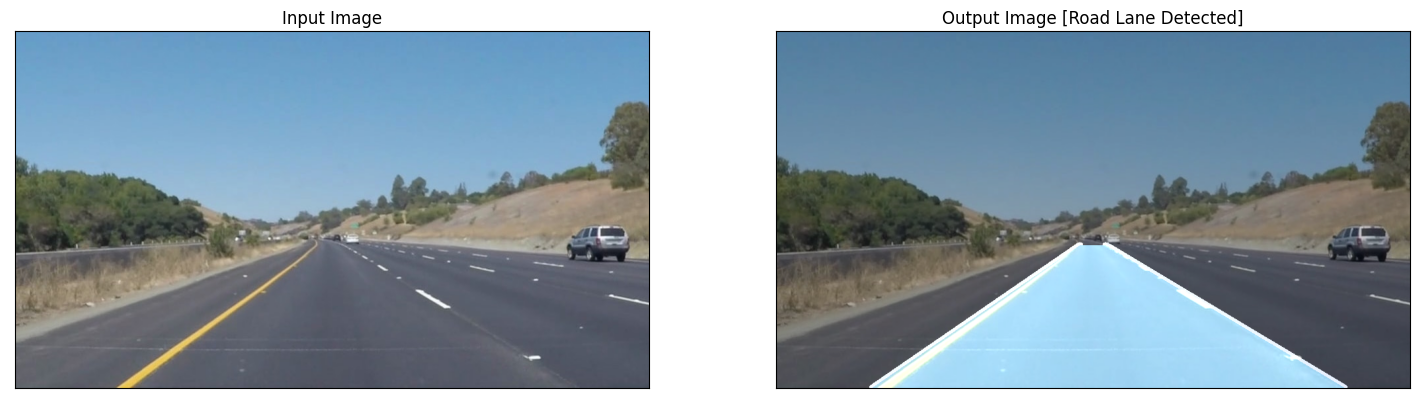

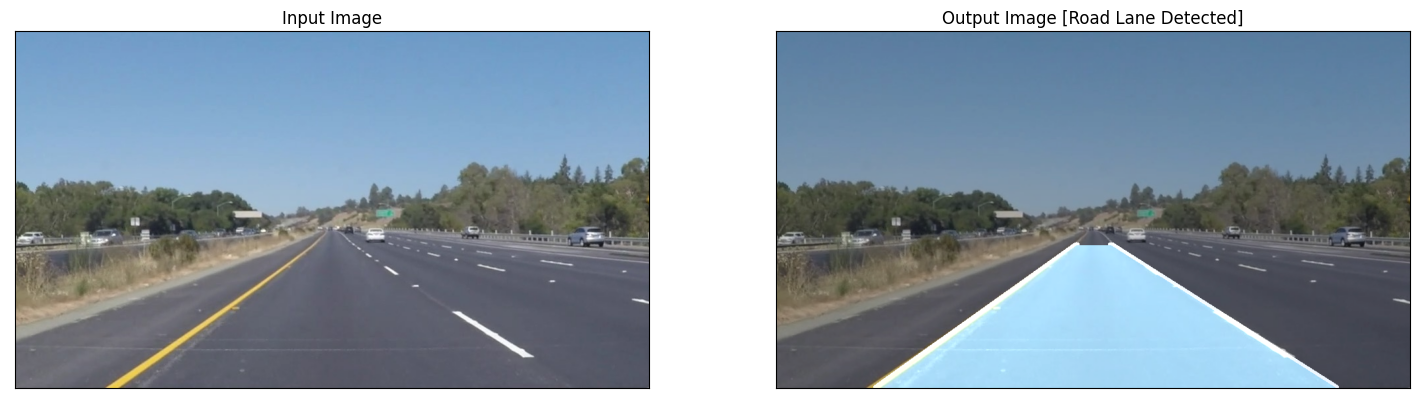

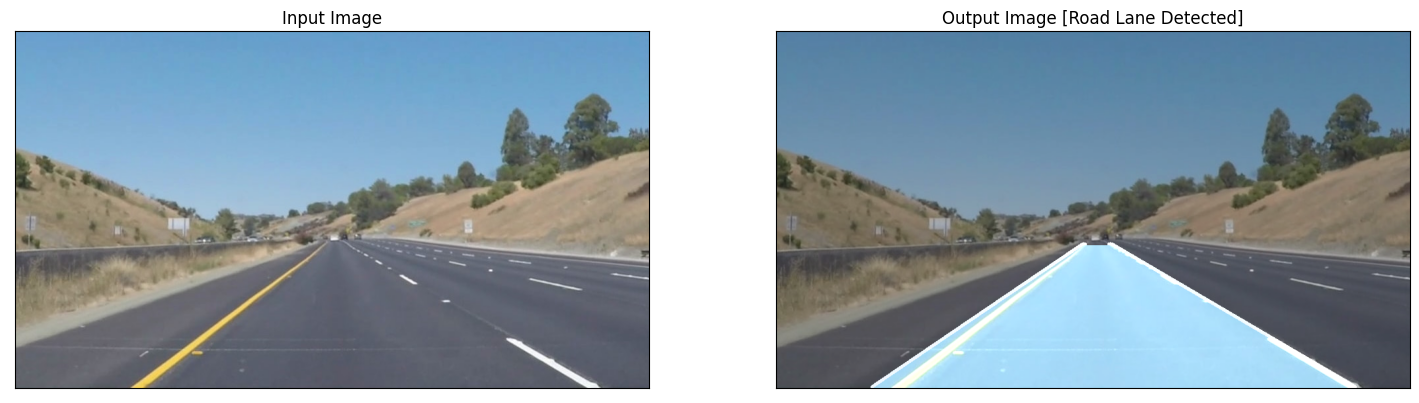

In [14]:
for image_path in list(os.listdir("C:\python\CodeClauseInternship_RoadLaneDetection\images")):
    fig = plt.figure(figsize=(18, 8))
    image = mpimg.imread(f"C:\python\CodeClauseInternship_RoadLaneDetection\images/{image_path}")
    ax = fig.add_subplot(1, 2, 1,xticks=[], yticks=[])
    plt.imshow(image)
    ax.set_title("Input Image")
    ax = fig.add_subplot(1, 2, 2,xticks=[], yticks=[])
    plt.imshow(pipeline(image))
    ax.set_title("Output Image [Road Lane Detected]")
    plt.show()